 # 中文文本分类项目



 本项目使用scikit-learn和jieba分词对THUCNews数据集进行中文文本分类，并通过网格搜索进行参数优化。

 ## 1. 导入必要的库

In [1]:
import pandas as pd
import numpy as np
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
import time

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


 ## 2. 定义数据加载和预处理函数

In [2]:
def load_data(file_path):
    """加载数据"""
    data = []      # 存储文本内容
    labels = []    # 存储标签
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            label, text = line.strip().split('\t')
            data.append(text)
            labels.append(label)
    return data, labels

def cut_words(text):
    """分词函数"""
    return ' '.join(jieba.cut(text))


 ## 3. 加载数据

In [3]:
print("正在加载数据...")
texts, labels = load_data('filtered_cnews.train.txt')
print(f'数据集大小: {len(texts)}')


正在加载数据...
数据集大小: 30000


 ## 4. 文本分词

In [4]:
print("正在进行分词...")
texts_cut = [cut_words(text) for text in texts]
print('分词示例：')
print(texts_cut[0])


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ASUS\AppData\Local\Temp\jieba.cache


正在进行分词...


Loading model cost 0.804 seconds.
Prefix dict has been built successfully.


分词示例：
马晓旭 意外 受伤 让 国奥 警惕   无奈 大雨 格外 青睐 殷家 军 记者 傅亚雨 沈阳 报道   来到 沈阳 ， 国奥队 依然 没有 摆脱 雨水 的 困扰 。 7 月 31 日 下午 6 点 ， 国奥队 的 日常 训练 再度 受到 大雨 的 干扰 ， 无奈 之下 队员 们 只 慢跑 了 25 分钟 就 草草收场 。 31 日 上午 10 点 ， 国奥队 在 奥体中心 外场 训练 的 时候 ， 天 就是 阴沉沉 的 ， 气象预报 显示 当天 下午 沈阳 就 有 大雨 ， 但 幸好 队伍 上午 的 训练 并 没有 受到 任何 干扰 。 下午 6 点 ， 当 球队 抵达 训练场 时 ， 大雨 已经 下 了 几个 小时 ， 而且 丝毫 没有 停下来 的 意思 。 抱 着 试一试 的 态度 ， 球队 开始 了 当天 下午 的 例行 训练 ， 25 分钟 过去 了 ， 天气 没有 任何 转好 的 迹象 ， 为了 保护 球员 们 ， 国奥队 决定 中止 当天 的 训练 ， 全队 立即 返回 酒店 。 在 雨 中 训练 对 足球队 来说 并 不是 什么 稀罕 事 ， 但 在 奥运会 即将 开始 之前 ， 全队 变得 “ 娇贵 ” 了 。 在 沈阳 最后 一周 的 训练 ， 国奥队 首先 要 保证 现有 的 球员 不再 出现意外 的 伤病 情况 以免 影响 正式 比赛 ， 因此 这一 阶段 控制 训练 受伤 、 控制 感冒 等 疾病 的 出现 被 队伍 放在 了 相当 重要 的 位置 。 而 抵达 沈阳 之后 ， 中 后卫 冯萧霆 就 一直 没有 训练 ， 冯萧霆 是 7 月 27 日 在 长春 患上 了 感冒 ， 因此 也 没有 参加 29 日 跟 塞尔维亚 的 热身赛 。 队伍 介绍 说 ， 冯萧霆 并 没有 出现 发烧 症状 ， 但 为了 安全 起 见 ， 这 两天 还是 让 他 静养 休息 ， 等 感冒 彻底 好 了 之后 再 恢复 训练 。 由于 有 了 冯萧霆 这个 例子 ， 因此 国奥队 对雨中 训练 就 显得 特别 谨慎 ， 主要 是 担心 球员 们 受凉 而 引发 感冒 ， 造成 非战斗 减员 。 而 女足 队员 马晓旭 在 热身赛 中 受伤 导致 无缘 奥运 的 前科 ， 也 让 在 沈阳 的 国奥队 现在 格外 警惕 ， “ 训练 中 不断 嘱

 ## 5. 划分训练集和测试集

In [5]:
print("正在划分训练集和测试集...")
X_train, X_test, y_train, y_test = train_test_split(
    texts_cut, labels, 
    test_size=0.2,    # 测试集占20%
    random_state=42   # 随机种子，保证结果可复现
)
print(f'训练集大小: {len(X_train)}')
print(f'测试集大小: {len(X_test)}')


正在划分训练集和测试集...
训练集大小: 24000
测试集大小: 6000


 ## 6. 特征提取

In [6]:
print("正在进行特征提取...")
tfidf = TfidfVectorizer(max_features=5000)  # 创建TF-IDF转换器，最多5000个特征
X_train_tfidf = tfidf.fit_transform(X_train)  # 训练并转换训练集
X_test_tfidf = tfidf.transform(X_test)        # 转换测试集
print(f'特征维度: {X_train_tfidf.shape}')


正在进行特征提取...
特征维度: (24000, 5000)


 ## 7. 参数优化

In [7]:
print("开始参数优化...")
# 定义参数网格
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # 平滑参数
    'fit_prior': [True, False]  # 是否学习类别先验概率
}

# 创建评分器
scorer = make_scorer(f1_score, average='macro')

# 创建网格搜索对象
grid_search = GridSearchCV(
    MultinomialNB(),
    param_grid,
    cv=5,  # 5折交叉验证
    scoring=scorer,
    n_jobs=-1,  # 使用所有CPU核心
    verbose=1
)

# 开始网格搜索
start_time = time.time()
grid_search.fit(X_train_tfidf, y_train)
end_time = time.time()

print(f"\n参数优化完成，耗时: {end_time - start_time:.2f}秒")
print("\n最佳参数:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\n最佳得分: {grid_search.best_score_:.4f}")


开始参数优化...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

参数优化完成，耗时: 7.18秒

最佳参数:
alpha: 0.1
fit_prior: True

最佳得分: nan


f:\python\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


 ## 8. 模型预测

In [8]:
print("使用最佳参数进行预测...")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)


使用最佳参数进行预测...


 ## 9. 模型评估

In [9]:
print("计算评估指标...")
# 计算宏平均
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, 
    average='macro'  # 使用宏平均
)
print('宏平均：')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# 计算微平均
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, 
    average='micro'  # 使用微平均
)
print('\n微平均：')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


计算评估指标...
宏平均：
Precision: 0.9445
Recall: 0.9435
F1-score: 0.9437

微平均：
Precision: 0.9437
Recall: 0.9437
F1-score: 0.9437


 ## 10. 混淆矩阵可视化

正在绘制混淆矩阵...


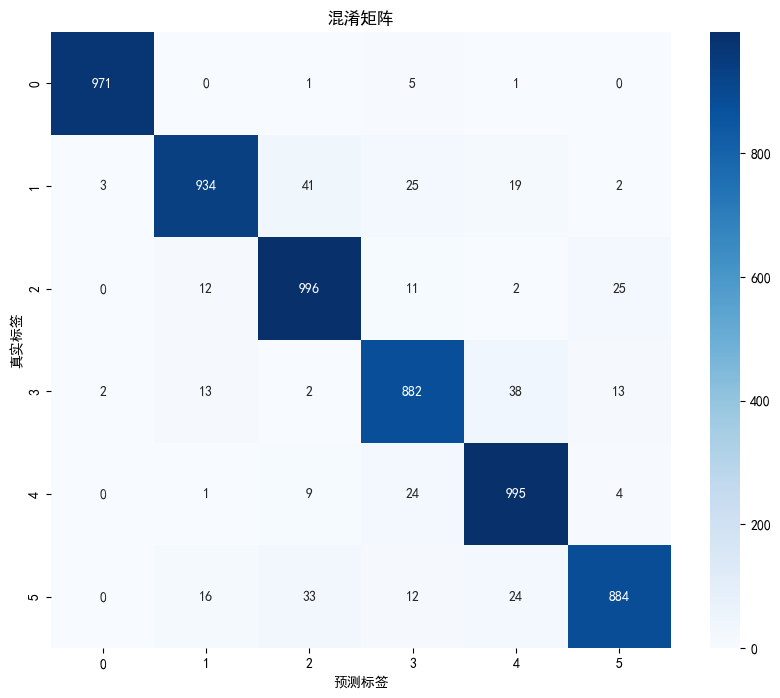

In [10]:
print("正在绘制混淆矩阵...")
cm = confusion_matrix(y_test, y_pred)  # 计算混淆矩阵
plt.figure(figsize=(10, 8))  # 创建图形
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 绘制热力图
plt.title('混淆矩阵')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()


 ## 11. 详细分类报告

In [11]:
print("生成分类报告...")
print(classification_report(y_test, y_pred))

生成分类报告...
              precision    recall  f1-score   support

          体育       0.99      0.99      0.99       978
          家居       0.96      0.91      0.93      1024
          房产       0.92      0.95      0.94      1046
          教育       0.92      0.93      0.92       950
          科技       0.92      0.96      0.94      1033
          财经       0.95      0.91      0.93       969

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

